<a href="https://colab.research.google.com/github/inkamah/colabtest/blob/main/cifar10New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
#print(tf.__version__)
#print(keras.__version__)

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
# normalize to range 0-1
x_train_norm = x_train_norm / 255.0
x_test_norm = x_test_norm / 255.0 
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

print(x_train_norm.dtype)

#plt.imshow(x_train[1])
#plt.imshow(x_train_norm[1])
         

170508288/170498071 [==============================] - 6s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)
float32


In [2]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [3]:
model = define_model()
# fit model
model.fit(x_train_norm, y_train, epochs=30, batch_size=64, validation_split = 0.2)
# save model
model.save('cifar10model.model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
625/625 [==============================] - 58s 23ms/step - loss: 2.0024 - accuracy: 0.2766 - val_loss: 1.4958 - val_accuracy: 0.4661
Epoch 2/30
625/625 [==============================] - 13s 21ms/step - loss: 1.4379 - accuracy: 0.4823 - val_loss: 1.3270 - val_accuracy: 0.5290
Epoch 3/30
625/625 [==============================] - 14s 22ms/step - loss: 1.2823 - accuracy: 0.5496 - val_loss: 1.2154 - val_accuracy: 0.5736
Epoch 4/30
625/625 [==============================] - 13s 21ms/step - loss: 1.1542 - accuracy: 0.5939 - val_loss: 1.1459 - val_accuracy: 0.5991
Epoch 5/30
625/625 [==============================] - 14s 22ms/step - loss: 1.0367 - accuracy: 0.6345 - val_loss: 1.0597 - val_accuracy: 0.6308
Epoch 6/30
625/625 [==============================] - 13s 21ms/step - loss: 0.9506 - accuracy: 0.6731 - val_loss: 1.0559 - val_accuracy: 0.6346
Epoch 7/30
625/625 [==============================] - 13s 21ms/step - loss: 0.8754 - accuracy: 0.6956 - val_loss: 0.9630 - val_accuracy:

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

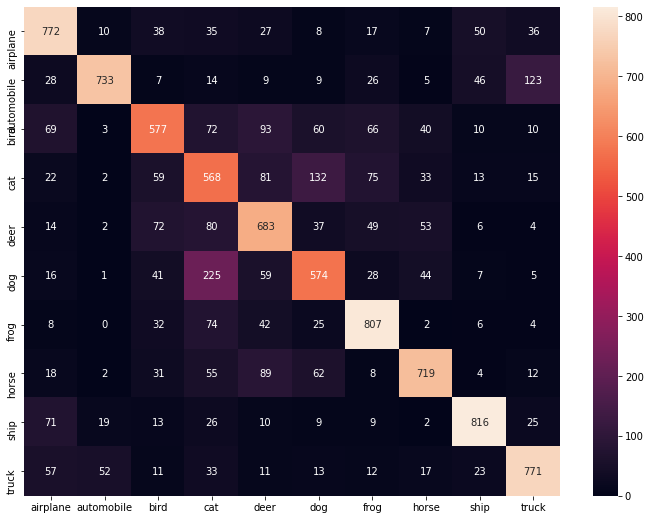

In [5]:
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(x_test_norm)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=cifar10_classes, yticklabels=cifar10_classes)

In [6]:
def prepare4predict (number):
    np.set_printoptions(suppress=True)
    xpred = x_test_norm[number].reshape(1, 32, 32, 3)
    plt.imshow(x_test_norm[number])
    return xpred
    #plt.imshow(x_test2[1])
    
def mypredict (xpred):
    ypred3 = model.predict(xpred)
    #print(ypred3[0][1])
    #print(ypred3.dtype)
    #print(ypred3.sort(axis=0))
    nclass = np.array(cifar10_classes)
    #print(nclass)
    classprob = np.zeros([], dtype=[('class', '<U10'), ('prob', '<f8')])
    #print(classprob.dtype)
    for i in range(0, NUM_CLASSES):
        
        #aufteilung = np.array([[cifar10_classes[i]], [ypred3[0][i]]])
        aufteilung = np.array([(nclass[i], ypred3[0][i])], dtype=[('class', '<U10'), ('prob', '<f8')])
        classprob = np.insert(classprob, [i], aufteilung)
        #print("{}".format(aufteilung))
        #print(aufteilung.type)
        
        #print ("{} -> {}".format(nclass[i], ypred3[0][i]))
        
    #print('hi')
    classprob = np.delete(classprob, 10)
    #print(classprob)
    #print(classprob.shape)
    c = np.sort(classprob, order='prob', axis=0)
    print(c)
    #print(classprob[:-1].sort(order='prob'))
    #print(asort.type)
    a=0
    for z in range(0, 10):
        q = c[z][1]
        a += q
    
    print(a)
    y_pred_c = np.argmax(ypred3, axis=1)
    #print(y_pred_c)
    predlab = cifar10_classes[y_pred_c[0]]
    print(predlab)
    return xpred

[('automobile', 0.        ) ('ship', 0.        ) ('truck', 0.00000039)
 ('horse', 0.00000071) ('airplane', 0.00000129) ('dog', 0.00043666)
 ('bird', 0.00310421) ('deer', 0.05551579) ('cat', 0.09996912)
 ('frog', 0.84097183)]
1.0000000021696813
frog


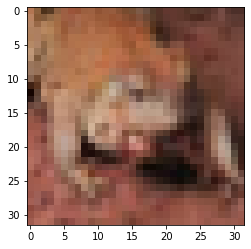

In [8]:
xpred = prepare4predict(5)
pred = mypredict (xpred)

In [10]:
import skimage.io 
import skimage.segmentation
import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    xpred[0].astype('double'), 
    model.predict, 
    top_labels=3, 
    hide_color=0, 
    num_samples=1000)

temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], 
    positive_only=True, 
    num_features=3, 
    hide_rest=True)
plt.imshow(skimage.segmentation.mark_boundaries(temp, mask))

ModuleNotFoundError: ignored